Imagem salva com sucesso como: reducao_hamiltoniano.png


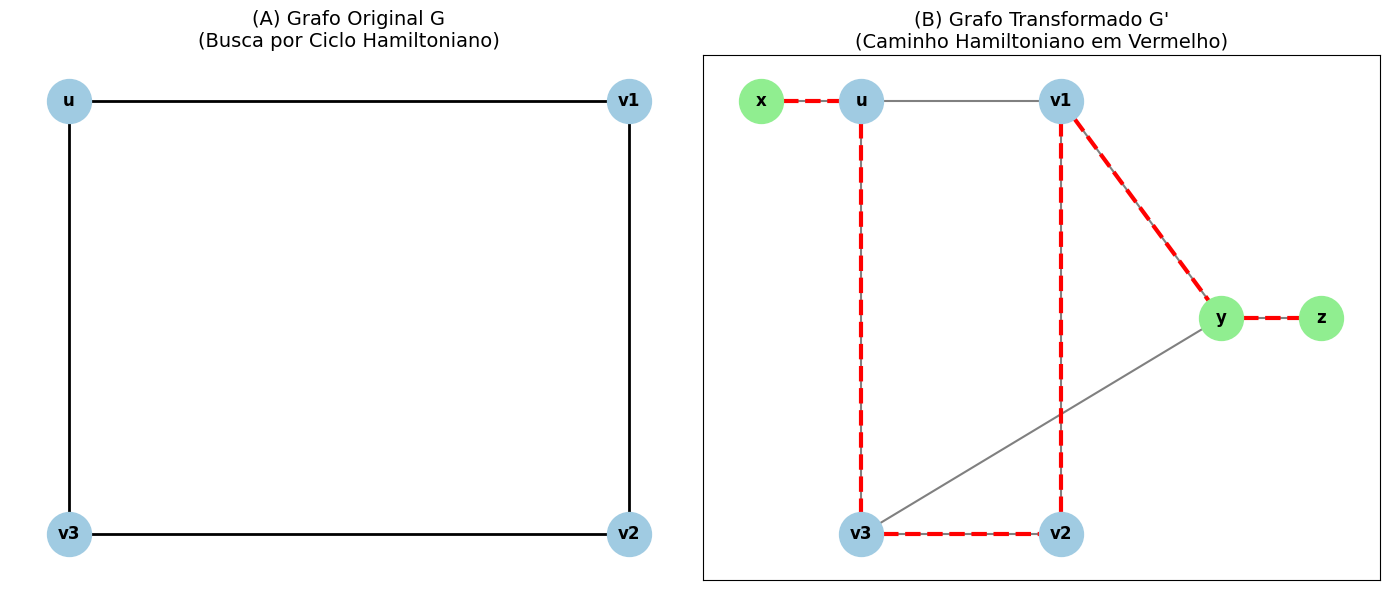

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def gerar_imagem_reducao():
    # Configurar a figura (2 subplots lado a lado)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # ---------------------------------------------------------
    # 1. GRAFO ORIGINAL G (Ciclo)
    # ---------------------------------------------------------
    G = nx.Graph()
    # Ciclo: u - v1 - v2 - v3 - u
    arestas_originais = [('u', 'v1'), ('v1', 'v2'), ('v2', 'v3'), ('v3', 'u')]
    G.add_edges_from(arestas_originais)

    # Posicionamento fixo para parecer um quadrado (mais organizado)
    pos_g = {
        'u':  (0, 1),
        'v1': (1, 1),
        'v2': (1, 0),
        'v3': (0, 0)
    }

    # Desenhar G
    ax1 = axes[0]
    nx.draw(G, pos_g, ax=ax1, with_labels=True, node_size=1000,
            node_color='#A0CBE2', edge_color='black', width=2, font_weight='bold', font_size=12)
    ax1.set_title("(A) Grafo Original G\n(Busca por Ciclo Hamiltoniano)", fontsize=14)

    # ---------------------------------------------------------
    # 2. GRAFO TRANSFORMADO G' (Caminho)
    # ---------------------------------------------------------
    G_prime = G.copy()

    # Adicionar vértices auxiliares
    G_prime.add_node('x')
    G_prime.add_node('y')
    G_prime.add_node('z')

    # Adicionar arestas da redução (conforme seu texto)
    # 1. Cauda inicial: x conecta em u
    G_prime.add_edge('x', 'u')
    # 2. Cauda final: y conecta em z
    G_prime.add_edge('y', 'z')
    # 3. Conector y: conecta nos vizinhos de u (v1 e v3)
    G_prime.add_edge('y', 'v1')
    G_prime.add_edge('y', 'v3')

    # Posicionamento para G' (esticando as pontas para facilitar a leitura)
    pos_prime = {
        'x':  (-0.5, 1),   # Cauda inicio
        'u':  (0, 1),      # Topo Esq
        'v1': (1, 1),      # Topo Dir
        'v2': (1, 0),      # Baixo Dir
        'v3': (0, 0),      # Baixo Esq
        'y':  (1.8, 0.5),  # "Coletor" no meio à direita
        'z':  (2.3, 0.5)   # Cauda fim
    }

    ax2 = axes[1]

    # Desenhar nós (Diferenciando os originais dos auxiliares)
    nx.draw_networkx_nodes(G_prime, pos_prime, ax=ax2, nodelist=['u','v1','v2','v3'],
                           node_size=1000, node_color='#A0CBE2', label='Originais')
    nx.draw_networkx_nodes(G_prime, pos_prime, ax=ax2, nodelist=['x','y','z'],
                           node_size=1000, node_color='#90EE90', label='Auxiliares') # Verde claro

    # Desenhar todas as arestas em cinza primeiro
    nx.draw_networkx_edges(G_prime, pos_prime, ax=ax2, width=1.5, edge_color='gray')

    # DESTACAR A SOLUÇÃO (O Caminho Hamiltoniano encontrado)
    # Caminho lógico: x -> u -> v3 -> v2 -> v1 -> y -> z
    caminho_solucao = [('x','u'), ('u','v3'), ('v3','v2'), ('v2','v1'), ('v1','y'), ('y','z')]

    nx.draw_networkx_edges(G_prime, pos_prime, ax=ax2, edgelist=caminho_solucao,
                           width=3, edge_color='red', style='dashed')

    # Labels
    nx.draw_networkx_labels(G_prime, pos_prime, ax=ax2, font_weight='bold', font_size=12)
    ax2.set_title("(B) Grafo Transformado G'\n(Caminho Hamiltoniano em Vermelho)", fontsize=14)

    # Legenda e Ajustes
    plt.tight_layout()

    # SALVAR A IMAGEM
    nome_arquivo = "reducao_hamiltoniano.png"
    plt.savefig(nome_arquivo, dpi=300, bbox_inches='tight')
    print(f"Imagem salva com sucesso como: {nome_arquivo}")
    plt.show()

if __name__ == "__main__":
    gerar_imagem_reducao()